# Random-Forest Classifier in titanic competition

### import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, plot_confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

***reading data***

In [2]:
df = pd.read_csv('final-df.csv')
df_test = pd.read_csv('final-test-df.csv')

***deleting extra column***

In [3]:
df, df_test = df.drop('Unnamed: 0', axis=1), df_test.drop('Unnamed: 0', axis=1)

***creating our x and y***

In [4]:
X = df.drop('Survived', axis=1)
y = df['Survived']

***scaling features***

In [5]:
X = StandardScaler().fit_transform(X)

### ***train-test split***

In [6]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=.2, random_state=42)

# ***creating initial model***

In [34]:
model = RandomForestClassifier(max_features='auto', criterion='entropy', max_depth=10, max_leaf_nodes=10).fit(train_x, train_y)

In [33]:
accuracy_score(model.predict(test_x), test_y)

0.8033707865168539

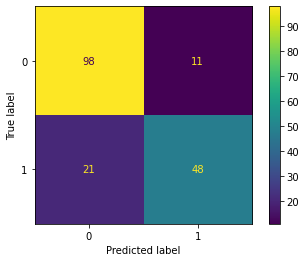

In [35]:
plot_confusion_matrix(model, test_x, test_y)

In [38]:
print(classification_report(test_y, model.predict(test_x)))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       109
           1       0.81      0.70      0.75        69

    accuracy                           0.82       178
   macro avg       0.82      0.80      0.80       178
weighted avg       0.82      0.82      0.82       178



# ***reaching optimal solution using GridSearchCV***

In [39]:
base_model = RandomForestClassifier()

In [41]:
criterion = ['gini', 'entropy']
max_depth = [2, 5, 10, 20]
max_leaf_nodes = [2, 5, 10, 20]
bootstrap = [True, False]
n_estimators = [10, 25, 50, 100, 200, 500]

In [42]:
params = {'criterion':criterion, 'max_depth':max_depth, 'max_leaf_nodes':max_leaf_nodes, 'bootstrap':bootstrap, 'n_estimators':n_estimators}

In [43]:
grid = GridSearchCV(base_model, params, cv=5)

In [44]:
grid.fit(train_x, train_y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 5, 10, 20],
                         'max_leaf_nodes': [2, 5, 10, 20],
                         'n_estimators': [10, 25, 50, 100, 200, 500]})

In [45]:
grid.best_estimator_

RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=10,
                       max_leaf_nodes=20, n_estimators=25)

In [46]:
grid.best_params_

{'bootstrap': False,
 'criterion': 'entropy',
 'max_depth': 10,
 'max_leaf_nodes': 20,
 'n_estimators': 25}

## Evalute our optimal model

In [47]:
def evaluator(model):
    yhat = model.predict(test_x)
    plot_confusion_matrix(model, test_x, test_y)
    print(classification_report(test_y, yhat))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       109
           1       0.79      0.70      0.74        69

    accuracy                           0.81       178
   macro avg       0.80      0.79      0.79       178
weighted avg       0.81      0.81      0.81       178



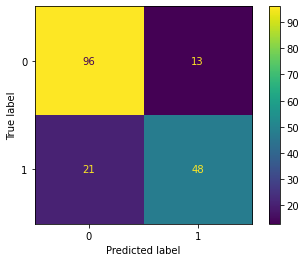

In [48]:
evaluator(grid)